In [12]:
import sys 
sys.path.append('..')
from common.util import create_contexts_target, most_similar
from cbow import CBOW
from common.optimizer import Adam
from common.trainer import Trainer

In [13]:
window_size = 5
hidden_size = 100
batch_size = 100
max_epoch = 10

In [14]:
from dataset import ptb
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus = corpus[:10000]

In [15]:
vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)


In [16]:
model = CBOW(vocab_size, hidden_size, window_size, corpus)

| epoch 1 | iter 1 / 99 | time 0[s] | loss 4.16
| epoch 1 | iter 6 / 99 | time 0[s] | loss 4.16
| epoch 1 | iter 11 / 99 | time 0[s] | loss 4.16
| epoch 1 | iter 16 / 99 | time 0[s] | loss 4.16
| epoch 1 | iter 21 / 99 | time 0[s] | loss 4.16
| epoch 1 | iter 26 / 99 | time 0[s] | loss 4.15
| epoch 1 | iter 31 / 99 | time 1[s] | loss 4.15
| epoch 1 | iter 36 / 99 | time 1[s] | loss 4.14
| epoch 1 | iter 41 / 99 | time 1[s] | loss 4.12
| epoch 1 | iter 46 / 99 | time 1[s] | loss 4.10
| epoch 1 | iter 51 / 99 | time 1[s] | loss 4.07
| epoch 1 | iter 56 / 99 | time 1[s] | loss 4.05
| epoch 1 | iter 61 / 99 | time 2[s] | loss 4.01
| epoch 1 | iter 66 / 99 | time 2[s] | loss 3.96
| epoch 1 | iter 71 / 99 | time 2[s] | loss 3.92
| epoch 1 | iter 76 / 99 | time 2[s] | loss 3.87
| epoch 1 | iter 81 / 99 | time 2[s] | loss 3.80
| epoch 1 | iter 86 / 99 | time 2[s] | loss 3.75
| epoch 1 | iter 91 / 99 | time 3[s] | loss 3.68
| epoch 1 | iter 96 / 99 | time 3[s] | loss 3.63
| epoch 2 | iter 1 / 9

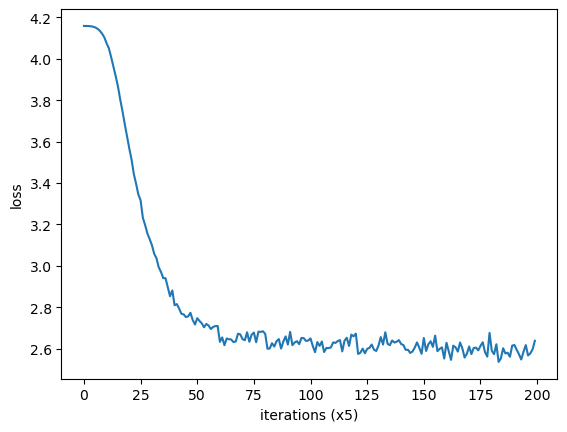

In [17]:
optimizer = Adam()
trainer = Trainer(model, optimizer)
trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [18]:
querys = ['you', 'year', 'car', 'toyota']
word_vecs = model.word_vecs
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs)


[query] you
's: 0.9908246397972107
is: 0.9895761609077454
amount: 0.9891573786735535
one: 0.9891409277915955
expected: 0.9888434410095215

[query] year
period: 0.9853566884994507
week: 0.9846556782722473
startling: 0.9844375848770142
despite: 0.9840003848075867
increased: 0.9836068749427795

[query] car
policy: 0.3632086217403412
remics: 0.33613094687461853
abuses: 0.322380393743515
contracting: 0.3205222487449646
walt: 0.32047808170318604

[query] toyota
originally: 0.3112938106060028
ethical: 0.30167534947395325
worries: 0.29843536019325256
flawed: 0.29827749729156494
rubicam: 0.2962060868740082
